# Goodreads Book Reviews Analysis and Sentiment Classification

**Authors: Tilova, Calvin, Clement**

---
Welcome to the Goodreads Book Reviews Analysis! This comprehensive dataset contains over 1.3 million book reviews, covering 25,475 books and involving 18,892 users. This data offers a unique opportunity to explore and analyze reader sentiments, preferences, and patterns within the Goodreads community.

## Objective

Our primary goal is to perform sentiment analysis on these book reviews. By leveraging advanced machine learning techniques, we aim to classify the sentiments expressed in the reviews as positive or negative. This analysis will help us gain insights into readers' opinions and how they perceive various books.

## Approach

To achieve our objective, we will employ the following machine learning algorithms:

1. **Decision Tree Classifier** 

2. **Random Forest Classifier** 

3. **XGBoost** 

## Notebook Structure

This notebook is organized into the following sections:

1. **Text Preprocessing** 
2. **Feature Engineering** 
3. **Model Training and Evaluation** 
4. **Results and Insights** 
5. **Conclusion:**

## Getting Started

Let's dive into the analysis and uncover the sentiment dynamics within the Goodreads community. Whether you're a data scientist, a book enthusiast, or someone curious about sentiment analysis, this notebook offers a comprehensive guide to understanding and classifying reader sentiments using cutting-edge machine learning techniques.

### Data Dictionary For This Notebook:

---
| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| rating (**Dependant Variable**)| Rating between 0-5 | int |
| review_text | The book review           | object |

## Table of Contents

---

1. Data Wrangling
2. Text preprocessing
3. Decision Tree
4. Random Forest
5. XgBoost

**Importing Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sk-learn text preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# modelling
from sklearn.tree import DecisionTreeClassifier

#model metrics
from sklearn.metrics import f1_score, classification_report

# ignores the filter warnings
import warnings
warnings.filterwarnings('ignore')

<a id = 'wrangle'></a>

### 1. Data Wrangling
---
Loading the CSVs files.

In [2]:
df_train = pd.read_csv('../data/goodreads_train.csv')

# First 5 rows of dataset
df_train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [3]:
df_train.drop(['user_id', 'book_id', 'review_id'], axis=1, inplace=True)

# sanity check
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rating        900000 non-null  int64 
 1   review_text   900000 non-null  object
 2   date_added    900000 non-null  object
 3   date_updated  900000 non-null  object
 4   read_at       808234 non-null  object
 5   started_at    625703 non-null  object
 6   n_votes       900000 non-null  int64 
 7   n_comments    900000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 54.9+ MB


### Text preprocessing

In [4]:
X = df_train['review_text']
y = df_train['rating']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
X_train.shape, X_test.shape

((630000,), (270000,))

In [6]:
# Initialize CountVectorizer
bow = CountVectorizer(stop_words='english', max_features=500)

# Fit and transform the review columns
X_train_vectorized = bow.fit_transform(X_train)
X_test_vectorized = bow.transform(X_test)

In [7]:
# convert sparse matrix into dataframe
# Source(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html)
X_train_dense = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=bow.get_feature_names_out()).sparse.to_dense()
X_test_dense = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=bow.get_feature_names_out()).sparse.to_dense()

# First 5 rows of training data
X_train_dense.head()

,able,absolutely,action,actual,actually,admit,adult,age,ago,amazing,...,write,writing,written,wrong,ya,yeah,year,years,yes,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


### Decision Tree

Let's instantiate Decision Tree

In [8]:
dt = DecisionTreeClassifier()

dt.fit(X_train_dense, y_train)

print(f"Train score: {dt.score(X_train_dense, y_train)}")
print(f"Test score: {dt.score(X_test_dense, y_test)}")

Train score: 0.9712968253968254
Test score: 0.3587814814814815


Train score is good. We can see there's a heavy overfit between the train and test scores. Let's visualize the max_depth to see where it overfits. 

In [11]:
max_depth = [10, 20, 30, 40, 50]
train_scores = []
test_scores = []

for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train_dense, y_train)

    train_scores.append(dt.score(X_train_dense, y_train))
    test_scores.append(dt.score(X_test_dense, y_test))

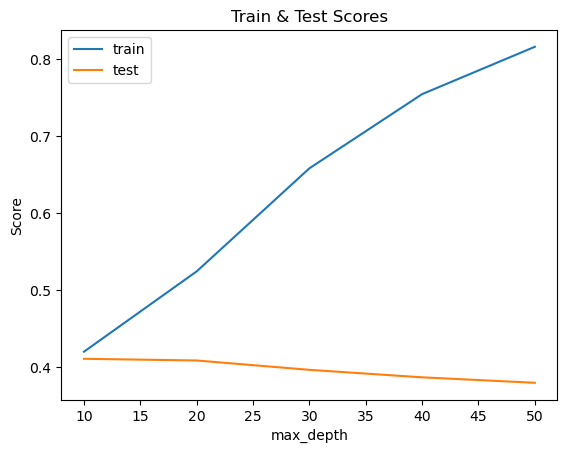

In [12]:
plt.figure()
plt.plot(max_depth, train_scores, label='train')
plt.plot(max_depth, test_scores, label='test')
plt.title('Train & Test Scores')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend()
plt.show()

In [13]:
max_depth = [5, 10, 15, 20]
train_scores = []
test_scores = []
f1_scores = []

for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train_dense, y_train)

    train_scores.append(dt.score(X_train_dense, y_train))
    test_scores.append(dt.score(X_test_dense, y_test))
    
    y_pred = dt.predict(X_test_dense)
    f1_scores.append(f1_score(y_test, y_pred, average='micro'))

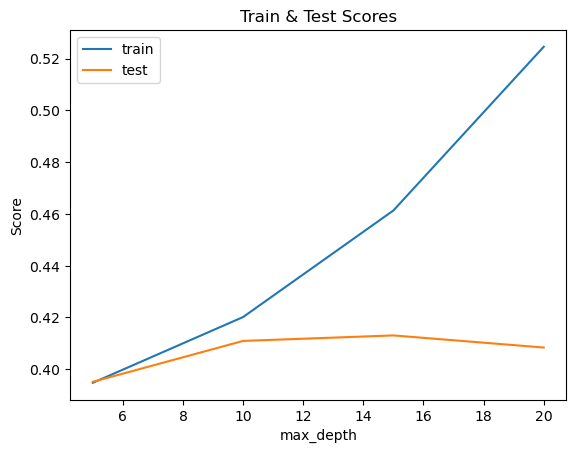

In [14]:
plt.figure()
plt.plot(max_depth, train_scores, label='train')
plt.plot(max_depth, test_scores, label='test')
plt.title('Train & Test Scores')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend()
plt.show()

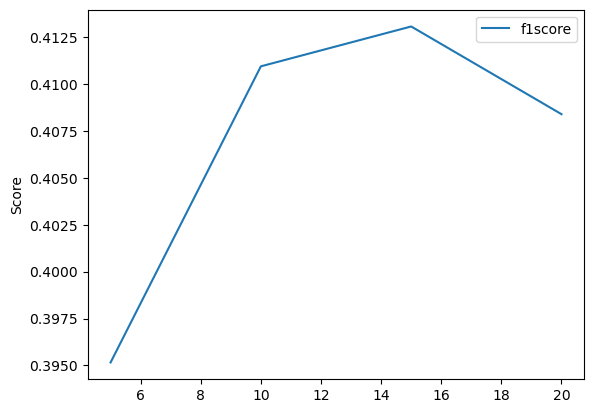

In [15]:
plt.figure()
plt.plot(max_depth, f1_scores, label='f1score')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
min_samples_split = [50, 60, 70]
train_scores = []
test_scores = []
f1_scores = []

for i in min_samples_split:
    dt = DecisionTreeClassifier(max_depth=10, min_samples_split=i)
    dt.fit(X_train_dense, y_train)

    train_scores.append(dt.score(X_train_dense, y_train))
    test_scores.append(dt.score(X_test_dense, y_test))
    
    y_pred = dt.predict(X_test_dense)
    f1_scores.append(f1_score(y_test, y_pred, average='micro'))

In [ ]:
plt.figure()
plt.plot(min_samples_split, train_scores, label='train')
plt.plot(min_samples_split, test_scores, label='test')
plt.title('Train & Test Scores')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend()
plt.show()